# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "RF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'RF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_RF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.219  1  0.346 0.557 0.002   
                             age        0.089  1  0.140 0.709 0.001   
                             Kiel       2.179  1  3.441 0.065 0.018   
                             Magdeburg  5.671  1  8.955 0.003 0.045   
                             Sweden     8.799  1 13.895 0.000 0.068   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.000  1  0.000 0.997 0.000   
                             age        0.348  1  0.329 0.567 0.002   
                             Kiel       0.158  1  0.150 0.699 0.001   
                             Magdeburg  3.100  1  2.937 0.088 0.015   
                             Sweden    13.843  1 13.117 0.000 0.064   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.254  0.695    False  
                             age               0.150  0.811    False  
                             Kiel              1.186  0.151    False  
                             Magdeburg         2.504  0.013     True  
                             Sweden            3.594  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.001  0.998    False  
                             age               0.247  0.703    False  
                             Kiel              0.155  0.804    False  
                             Magdeburg         1.055  0.189    False  
                             Sweden            3.426  0.002     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      RF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.999  1  7.545 0.007 0.038   
                             age        0.003  1  0.024 0.878 0.000   
                             Kiel       0.212  1  1.601 0.207 0.008   
                             Magdeburg  0.390  1  2.947 0.088 0.015   
                             Sweden     1.535  1 11.594 0.001 0.057   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.311  1  2.910 0.090 0.015   
                             age        0.891  1  1.979 0.161 0.010   
                             Kiel       1.573  1  3.492 0.063 0.018   
                             Magdeburg  1.075  1  2.386 0.124 0.012   
                             Sweden    10.631  1 23.599 0.000 0.110   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.181  0.020     True  
                             age               0.057  0.927    False  
                             Kiel              0.683  0.332    False  
                             Magdeburg         1.057  0.168    False  
                             Sweden            3.093  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.047  0.171    False  
                             age               0.793  0.272    False  
                             Kiel              1.199  0.130    False  
                             Magdeburg         0.906  0.222    False  
                             Sweden            5.608  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.557         0.254  0.695    False   
                             Kiel      0.065         1.186  0.151    False   
                             Magdeburg 0.003         2.504  0.013     True   
                             Sweden    0.000         3.594  0.002     True   
                             age       0.709         0.150  0.811    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.997         0.001  0.998    False   
                             Kiel      0.699         0.155  0.804    False   
                             Magdeburg 0.088         1.055  0.189    False   
                             Sweden    0.000         3.426  0.002     True   
                             age       0.567         0.247  0.703    False   

model                                     RF                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.007         2.181  0.020     True  
                             Kiel      0.207         0.683  0.332    False  
                             Magdeburg 0.088         1.057  0.168    False  
                             Sweden    0.001         3.093  0.003     True  
                             age       0.878         0.057  0.927    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.090         1.047  0.171    False  
                             Kiel      0.063         1.199  0.130    False  
                             Magdeburg 0.124         0.906  0.222    False  
                             Sweden    0.000         5.608  0.000     True  
                             age       0.161         0.793  0.272    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'RF': 'RF'}

## Describe scores

In [10]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.259         2.491     0.335     0.235         3.085     0.293
std       0.302         5.382     0.329     0.298         5.833     0.325
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.335     0.015     0.001         0.384     0.003
50%       0.121         0.918     0.242     0.072         1.141     0.145
75%       0.462         2.421     0.616     0.413         3.079     0.551
max       1.000       149.871     1.000     1.000        85.705     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_50136/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.557         0.254   
A0A024R0T9;K7ER74;P02655                           AD     0.043         1.363   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.137         0.864   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.457         0.340   
A0A075B6H7                                         AD     0.109         0.962   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.136         0.867   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.664         0.178   
S4R3U6                                             AD     0.997         0.001   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.695    False   
A0A024R0T9;K7ER74;P02655                           AD      0.108    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.263    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.612    False   
A0A075B6H7                                         AD      0.224    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.315    False   
Q9Y6X5                                             AD      0.262    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.780    False   
S4R3U6                                             AD      0.998    False   

model                                                        RF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.007         2.181   
A0A024R0T9;K7ER74;P02655                           AD     0.027         1.574   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.408         0.389   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.257         0.591   
A0A075B6H7                                         AD     0.004         2.366   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.200         0.698   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.478         0.321   
S4R3U6                                             AD     0.090         1.047   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.020     True  
A0A024R0T9;K7ER74;P02655                           AD      0.064    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.546    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.391    False  
A0A075B6H7                                         AD      0.014     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.250         1.405     0.332     0.250         1.513     0.316
std       0.289         1.640     0.314     0.294         1.775     0.318
min       0.000         0.000     0.000     0.000         0.001     0.000
25%       0.012         0.360     0.040     0.009         0.361     0.026
50%       0.116         0.935     0.234     0.105         0.980     0.194
75%       0.437         1.913     0.596     0.435         2.042     0.573
max       0.999        24.249     1.000     0.997        19.925     0.998

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,RF
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1032,974


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.557         0.254  0.695   
A0A024R0T9;K7ER74;P02655                           0.043         1.363  0.108   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.137         0.864  0.263   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.457         0.340  0.612   
A0A075B6H7                                         0.109         0.962  0.224   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.315   
Q9Y6X5                                             0.136         0.867  0.262   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.664         0.178  0.780   
S4R3U6                                             0.997         0.001  0.998   

                                                               RF  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.007   
A0A024R0T9;K7ER74;P02655                              False 0.027   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.408   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.257   
A0A075B6H7                                            False 0.004   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.200   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.478   
S4R3U6                                                False 0.090   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.181  0.020   
A0A024R0T9;K7ER74;P02655                                   1.574  0.064   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.389  0.546   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.591  0.391   
A0A075B6H7                                                 2.366  0.014   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.291   
Q9Y6X5                                                     0.698  0.324   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.162   
Q9Y6Y9                                                     0.321  0.611   
S4R3U6                                                     1.047  0.171   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - RF (no)    904
PI (yes) - RF (yes)   319
PI (no)  - RF (yes)   128
PI (yes) - RF (no)     70
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_50136/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A024QZX5;A0A087X1N8;P35237          0.557         0.254  0.695    False   
A0A075B6H7                            0.109         0.962  0.224    False   
A0A075B6R2                            0.439         0.358  0.598    False   
A0A075B7B8                            0.159         0.797  0.293    False   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.110         0.959  0.226    False   
...                                     ...           ...    ...      ...   
Q9ULZ9                                0.002         2.735  0.008     True   
Q9UNW1                                0.005         2.278  0.020     True   
Q9UP79                                0.255         0.594  0.411    False   
Q9UQ52                                0.046         1.337  0.114    False   
Q9Y6C2                                0.535         0.272  0.678    False   

                                         RF                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A024QZX5;A0A087X1N8;P35237          0.007         2.181  0.020     True   
A0A075B6H7                            0.004         2.366  0.014     True   
A0A075B6R2                            0.001         2.834  0.005     True   
A0A075B7B8                            0.000         4.177  0.000     True   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.005         2.303  0.015     True   
...                                     ...           ...    ...      ...   
Q9ULZ9                                0.040         1.394  0.090    False   
Q9UNW1                                0.977         0.010  0.988    False   
Q9UP79                                0.000         4.088  0.000     True   
Q9UQ52                                0.001         3.121  0.003     True   
Q9Y6C2                                0.011         1.972  0.030     True   

                                           data  
                                      frequency  
protein groups                                   
A0A024QZX5;A0A087X1N8;P35237                186  
A0A075B6H7                                   91  
A0A075B6R2                                  164  
A0A075B7B8                                   57  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2       114  
...                                         ...  
Q9ULZ9                                      171  
Q9UNW1                                      171  
Q9UP79                                      135  
Q9UQ52                                      188  
Q9Y6C2                                      119  

[198 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,RF,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.695,0.020,186,PI (no) - RF (yes)
A0A024R0T9;K7ER74;P02655,0.108,0.064,195,PI (no) - RF (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.263,0.546,174,PI (no) - RF (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.612,0.391,196,PI (no) - RF (no)
A0A075B6H7,0.224,0.014,91,PI (no) - RF (yes)
...,...,...,...,...
Q9Y6R7,0.315,0.291,197,PI (no) - RF (no)
Q9Y6X5,0.262,0.324,173,PI (no) - RF (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.162,197,PI (no) - RF (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,RF,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
Q9UNW1,0.020,0.988,171,PI (yes) - RF (no),0.968
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2,0.967,0.000,134,PI (no) - RF (yes),0.967
F6VDH7;P50502;Q3KNR6,0.008,0.967,175,PI (yes) - RF (no),0.960
P52758,0.000,0.947,119,PI (yes) - RF (no),0.947
O75083,0.045,0.992,102,PI (yes) - RF (no),0.947
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.057,0.049,197,PI (no) - RF (yes),0.008
Q9NX62,0.055,0.047,197,PI (no) - RF (yes),0.008
P00740;P00740-2,0.053,0.045,197,PI (no) - RF (yes),0.008


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_1_RF


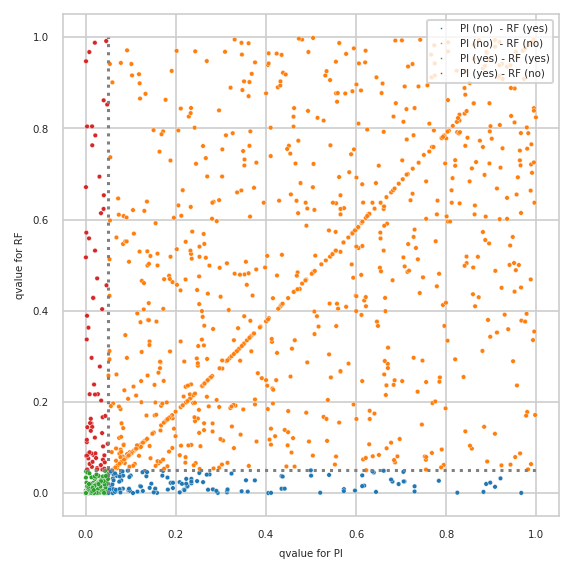

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_2_RF


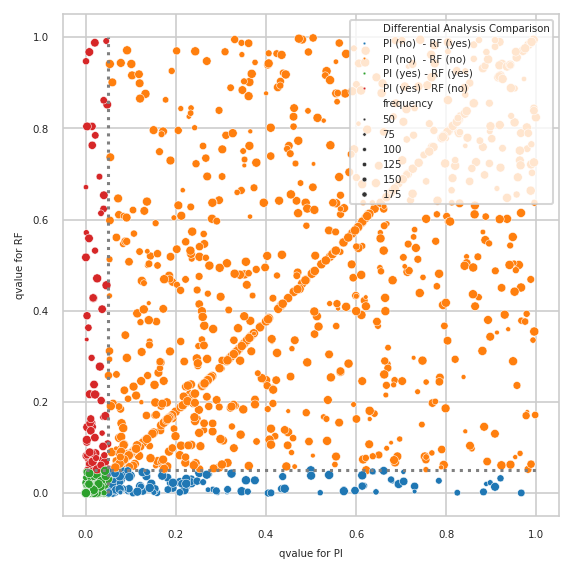

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APOE,ENSP00000252486,5.000
PSEN2,ENSP00000355747,5.000
APP,ENSP00000284981,5.000
PSEN1,ENSP00000326366,5.000
MAPT,ENSP00000340820,4.800
...,...,...
FRAT2,ENSP00000360058,0.681
CLEC4M,ENSP00000316228,0.681
DSC2,ENSP00000280904,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/3fa5fb1d5dd2a817778dc1597a6471cf_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out